In [1]:
import pandas as pd
import os

#read in data and ouput a single data file that we can use
datadir = 'C:\\Users\\richard\\OneDrive - University College London\\public\\QUANT\\DAFNI_SCQUAIR\\data'
#then OneLink_rail, OneLink_bus, OneLink_road
onelinkraildir = os.path.join(datadir,'OneLink_rail')
railfiles = [
    '00-00_missing_impacts_20240117_093108.csv', 'casa10000_i800_impacts_20240222_143321.csv', 'casa10000_i800_impacts_20240223_150347.csv',
    'casa10000_impacts_20240212_190621.csv', 'casa10000_impacts_20240213_104951.csv', 'casa10000_impacts_20240214_105846.csv',
    'casa10000_impacts_20240215_105327.csv', 'casa10000_impacts_20240220_101211.csv', 'casa1000_impacts_20240212_165724.csv',
    'casa50000_impacts_20240216_104051.csv', 'casa50000_impacts_20240221_093037.csv', 'dafni5000_impacts_20240216_105009.csv',
    'dafni5000_impacts_20240219_100521.csv', 'dafni5000_impacts_20240220_154019.csv', 'dafni5000_impacts_20240221_213346.csv',
    'dafni5000_impacts_20240223_150019.csv', 'dafni_00-00_impacts_20240116_102453.csv', 'dafni_impacts_20240112_164749.csv',
    'dafni_impacts_20240115_103315.csv', 'dafni_impacts_20240115_163502.csv', 'dafni_impacts_20240116_203730.csv',
    'dafni_impacts_20240117_092943.csv', 'dafni_impacts_20240117_171433.csv', 'dafni_impacts_20240118_110713.csv',
    'dafni_impacts_20240119_112620.csv', 'dafni_impacts_20240122_103316.csv', 'dafni_impacts_20240124_150652.csv',
    'dafni_impacts_20240129_141416.csv', 'dafni_impacts_20240130_114743.csv', 'dafni_impacts_20240131_104939.csv',
    'dafni_impacts_20240201_110903.csv', 'dafni_impacts_20240202_115131.csv', 'dafni_impacts_20240205_115847.csv',
    'dafni_impacts_20240206_095815.csv', 'dafni_impacts_20240208_135859.csv', 'dafni_impacts_20240213_105835.csv',
    'dafni_impacts_20240214_110510.csv', 'dafni_impacts_20240215_105120.csv', 'dafni_impacts_20240215_171606.csv'
]

onelinkbusdir = os.path.join(datadir,'OneLink_bus')
busfiles = [
    'bus_casa10000_impacts_20240226_191128.csv', 'bus_casa10000_impacts_20240227_102736.csv', 'bus_casa10000_impacts_20240228_110223.csv',
    'bus_casa10000_impacts_20240229_112850.csv', 'bus_casa20000_impacts_20240311_103048.csv', 'bus_casa50000_impacts_20240301_152537.csv',
    'bus_casa50000_impacts_20240304_164606.csv', 'bus_casa50000_impacts_20240306_120612.csv'
]

onelinkroaddir = os.path.join(datadir,'OneLink_road')
roadfiles = [
    'road_casa50000_impacts_20240314_160830.csv', 'road_casa50000_impacts_20240318_102033.csv', 'road_casa50000_impacts_20240321_143811.csv',
    'road_casa50000_impacts_20240325_103707.csv'
]

#rail
if not os.path.isfile('raildata.csv'):
    frames = []
    for filename in railfiles:
        df = pd.read_csv(os.path.join(onelinkraildir,filename), index_col=None, header=0, skipinitialspace=True)
        frames.append(df)

    df_raildata = pd.concat(frames,axis=0,ignore_index=True)
    df_raildata.to_csv('raildata.csv',index=False) #write out a raw csv file with all the data files concatenated
else:
    df_raildata = pd.read_csv('raildata.csv')

#bus
if not os.path.isfile('busdata.csv'):
    frames = []
    for filename in busfiles:
        df = pd.read_csv(os.path.join(onelinkbusdir,filename), index_col=None, header=0, skipinitialspace=True)
        frames.append(df)

    df_busdata = pd.concat(frames,axis=0,ignore_index=True)
    df_busdata.to_csv('busdata.csv',index=False) #write out a raw csv file with all the data files concatenated
else:
    df_busdata = pd.read_csv('busdata.csv')


#road
if not os.path.isfile('roaddata.csv'):
    frames = []
    for filename in roadfiles:
        df = pd.read_csv(os.path.join(onelinkroaddir,filename), index_col=None, header=0, skipinitialspace=True)
        frames.append(df)

    df_roaddata = pd.concat(frames,axis=0,ignore_index=True)
    df_roaddata.to_csv('roaddata.csv',index=False) #write out a raw csv file with all the data files concatenated
else:
    df_roaddata = pd.read_csv('roaddata.csv')


#now merge the raw file(s) with the OiDj data

#load table containing Oi and Dj that we need to join with the scenario data
df_OiDjTable = pd.read_csv(os.path.join(datadir,'OiDjTable.csv'))
df_OiDjTable.set_index('zonei')
#print(df_OiDjTable.head())
#zonei	Oi_road	Oi_bus	Oi_rail	Oi_all	Dj_road	Dj_bus	Dj_rail	Dj_all

###
#rail data merge with OiDj data

#first, merge on the net_i/zonei values for Oi and Dj
df = pd.merge(df_raildata,df_OiDjTable,left_on='net_i',right_on='zonei')
#rename columns to associate with net_i
df.rename(columns={
    'Oi_road':'net_i_Oi_road', 'Oi_bus':'net_i_Oi_bus', 'Oi_rail':'net_i_Oi_rail', 'Oi_all':'net_i_Oi_all',
    'Dj_road':'net_i_Dj_road', 'Dj_bus':'net_i_Dj_bus', 'Dj_rail':'net_i_Dj_rail', 'Dj_all':'net_i_Dj_all'
}, inplace=True)
#then, merge on the net_j/zonei values for Oi and Dj
df = pd.merge(df,df_OiDjTable,left_on='net_j',right_on='zonei')
#rename columns to associate with net_j
df.rename(columns={
    'Oi_road':'net_j_Oi_road', 'Oi_bus':'net_j_Oi_bus', 'Oi_rail':'net_j_Oi_rail', 'Oi_all':'net_j_Oi_all',
    'Dj_road':'net_j_Dj_road', 'Dj_bus':'net_j_Dj_bus', 'Dj_rail':'net_j_Dj_rail', 'Dj_all':'net_j_Dj_all'
},inplace=True)
df.to_csv('raildata_OiDj.csv',index=False)
#print(df.head())

###
#bus data merge with OiDj data

#first, merge on the net_i/zonei values for Oi and Dj
df = pd.merge(df_busdata,df_OiDjTable,left_on='net_i',right_on='zonei')
#rename columns to associate with net_i
df.rename(columns={
    'Oi_road':'net_i_Oi_road', 'Oi_bus':'net_i_Oi_bus', 'Oi_rail':'net_i_Oi_rail', 'Oi_all':'net_i_Oi_all',
    'Dj_road':'net_i_Dj_road', 'Dj_bus':'net_i_Dj_bus', 'Dj_rail':'net_i_Dj_rail', 'Dj_all':'net_i_Dj_all'
}, inplace=True)
#then, merge on the net_j/zonei values for Oi and Dj
df = pd.merge(df,df_OiDjTable,left_on='net_j',right_on='zonei')
#rename columns to associate with net_j
df.rename(columns={
    'Oi_road':'net_j_Oi_road', 'Oi_bus':'net_j_Oi_bus', 'Oi_rail':'net_j_Oi_rail', 'Oi_all':'net_j_Oi_all',
    'Dj_road':'net_j_Dj_road', 'Dj_bus':'net_j_Dj_bus', 'Dj_rail':'net_j_Dj_rail', 'Dj_all':'net_j_Dj_all'
},inplace=True)
df.to_csv('busdata_OiDj.csv',index=False)

###
#road data merge with OiDj data

#first, merge on the net_i/zonei values for Oi and Dj
df = pd.merge(df_roaddata,df_OiDjTable,left_on='net_i',right_on='zonei')
#rename columns to associate with net_i
df.rename(columns={
    'Oi_road':'net_i_Oi_road', 'Oi_bus':'net_i_Oi_bus', 'Oi_rail':'net_i_Oi_rail', 'Oi_all':'net_i_Oi_all',
    'Dj_road':'net_i_Dj_road', 'Dj_bus':'net_i_Dj_bus', 'Dj_rail':'net_i_Dj_rail', 'Dj_all':'net_i_Dj_all'
}, inplace=True)
#then, merge on the net_j/zonei values for Oi and Dj
df = pd.merge(df,df_OiDjTable,left_on='net_j',right_on='zonei')
#rename columns to associate with net_j
df.rename(columns={
    'Oi_road':'net_j_Oi_road', 'Oi_bus':'net_j_Oi_bus', 'Oi_rail':'net_j_Oi_rail', 'Oi_all':'net_j_Oi_all',
    'Dj_road':'net_j_Dj_road', 'Dj_bus':'net_j_Dj_bus', 'Dj_rail':'net_j_Dj_rail', 'Dj_all':'net_j_Dj_all'
},inplace=True)
df.to_csv('roaddata_OiDj.csv',index=False)

#end of data production


SCATTER PLOTS OF nMinus/savedSecs for All, Rail, Bus, Road

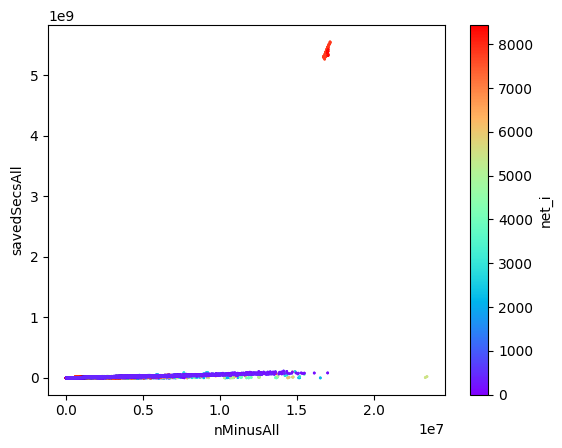

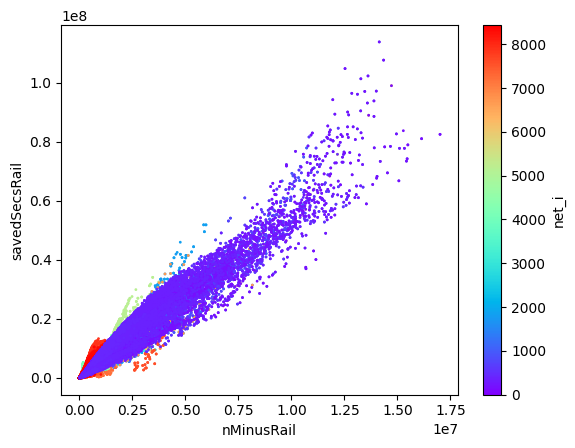

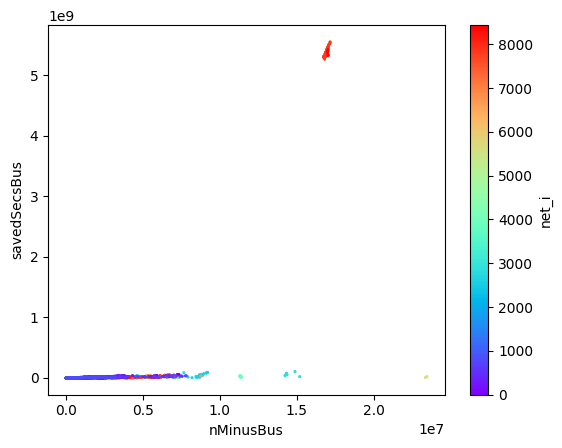

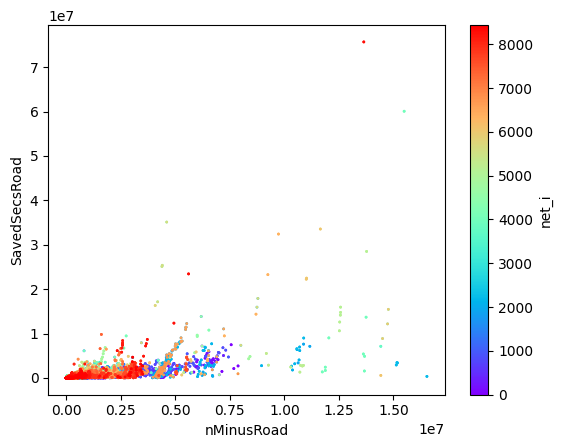

In [5]:
#plotting nMinus[Road|Bus|Rail]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#todo:

df_raildataOiDj = pd.read_csv('raildata_OiDj.csv')
df_busdataOiDj = pd.read_csv('busdata_OiDj.csv')
df_roaddataOiDj = pd.read_csv('roaddata_OiDj.csv')
df_allOiDj = pd.concat([df_roaddataOiDj, df_busdataOiDj, df_raildataOiDj])
df_allOiDj['nMinusAll'] = df_allOiDj['nMinusRoad'] + df_allOiDj['nMinusBus'] + df_allOiDj['nMinusRail']
df_allOiDj['savedSecsAll'] = df_allOiDj['SavedSecsRoad'] + df_allOiDj['savedSecsBus'] + df_allOiDj['savedSecsRail']

#df_raildataOiDj.plot(kind = 'scatter', s=1, x = 'nMinusRail', y = 'CkDiffRail', c='net_j', cmap="rainbow")

#plots of nminus against saved seconds - rail is linear others not!?
df_allOiDj.plot(kind = 'scatter', s=1, x = 'nMinusAll', y = 'savedSecsAll', c='net_i', cmap="rainbow")
df_raildataOiDj.plot(kind = 'scatter', s=1, x = 'nMinusRail', y = 'savedSecsRail', c='net_i', cmap="rainbow")
df_busdataOiDj.plot(kind = 'scatter', s=1, x = 'nMinusBus', y = 'savedSecsBus', c='net_i', cmap="rainbow")
df_roaddataOiDj.plot(kind = 'scatter', s=1, x = 'nMinusRoad', y = 'SavedSecsRoad', c='net_i', cmap="rainbow")
plt.show()



Frequency Plots of nMinus and savedSecs for All, Rail, Bus and Road (also log all)

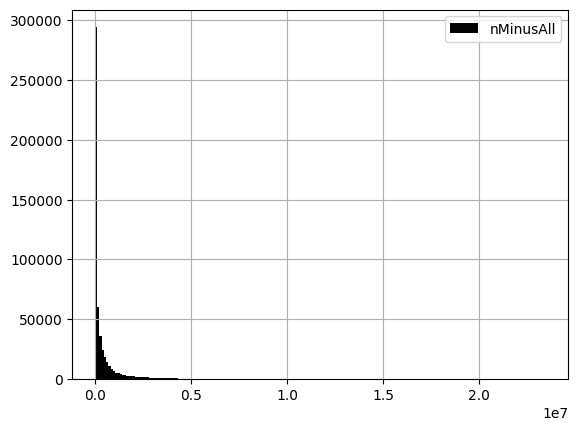

count(nMinusAll<1000)= 81288 count= 533284 max= 23472873 mean= 461161.58748809266


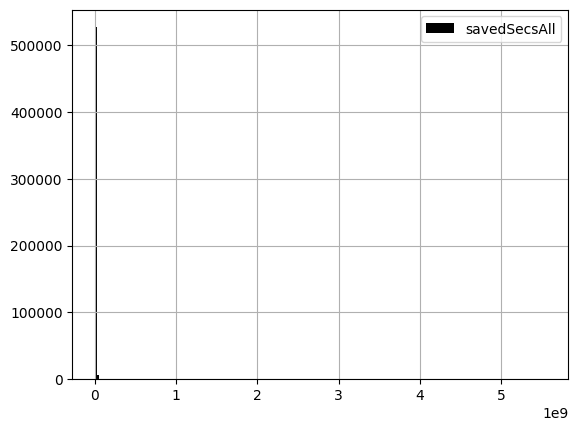

count(savedSecsAll<1000)= 96648 count= 533284 max= 5550133871.330791 mean= 3281499.0057575507


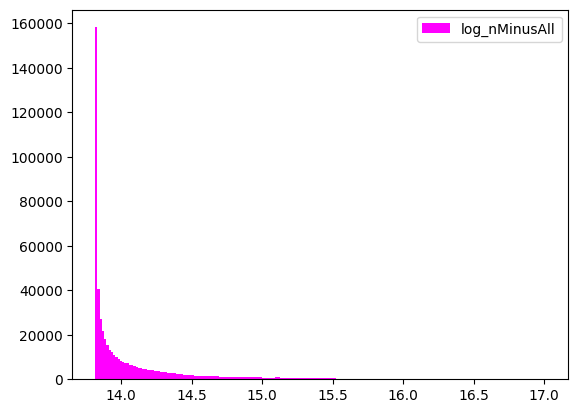

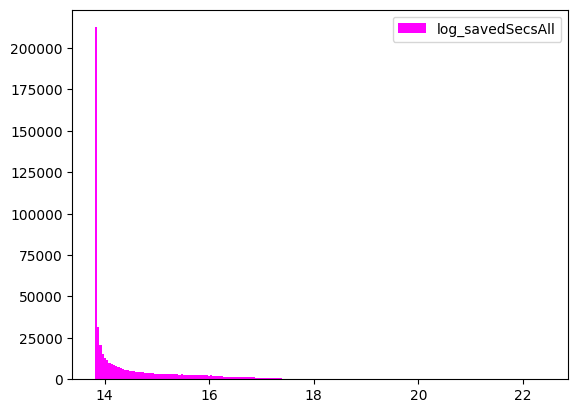

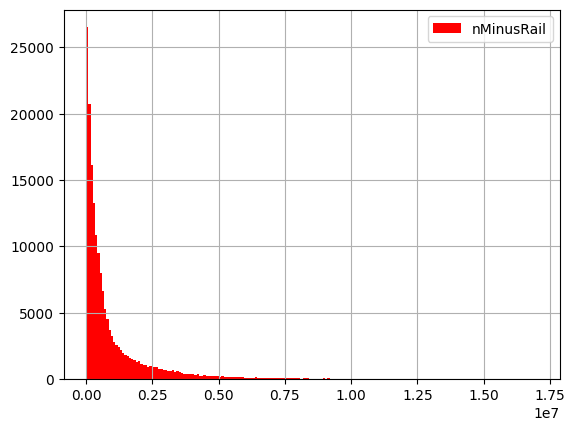

count(nMinusRail<1000)= 821 count= 175793 max= 17013467 mean= 991963.8317452914


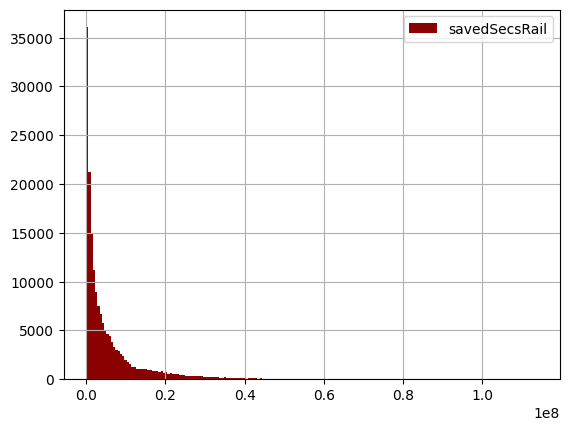

count(savedSecsRail<1000)= 421 count= 175793 max= 113837595.4429246 mean= 5896039.2088037655


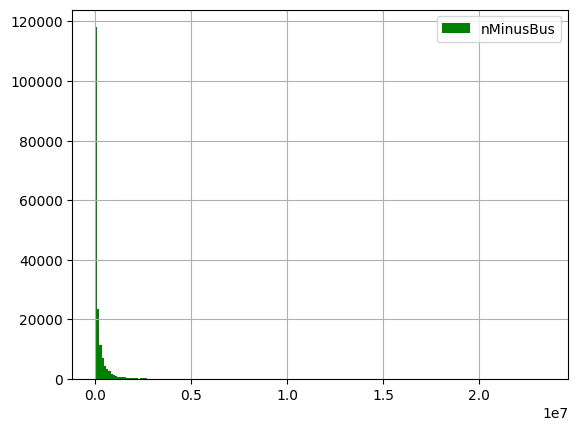

count(nMinusBus<1000)= 24832 count= 182315 max= 23472873 mean= 240672.42355812743


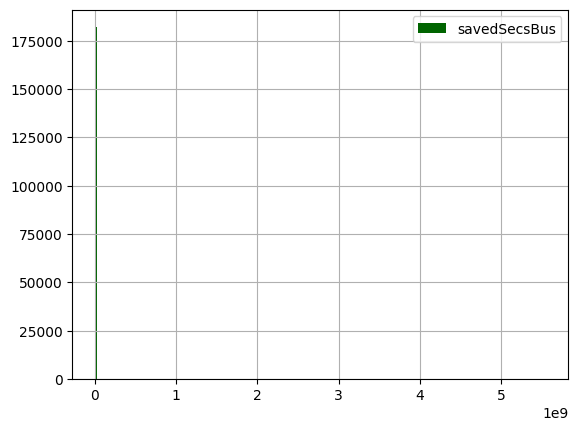

count(savedSecsBus<1000)= 24196 count= 182315 max= 5550133871.330791 mean= 3837737.686757171


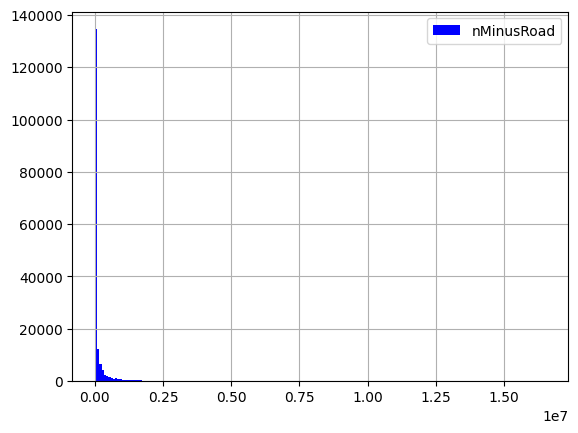

count(nMinusRoad<1000)= 55635 count= 175176 max= 16536322 mean= 157964.59130817006


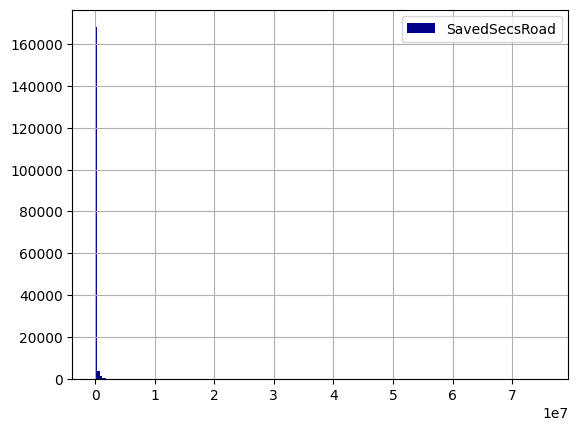

count(SavedSecsRoad<1000)= 72031 count= 175176 max= 75680708.39954379 mean= 78842.69986777012


In [18]:
def printstats(df,col):
    count=len(df) #or df.shape[0]
    zero=np.sum(df[col]<1000)
    max=np.max(df[col])
    mean=np.mean(df[col])
    print("count("+col+"<1000)=", zero, "count=", count, "max=",max, "mean=",mean)
###

#all
df_allOiDj['nMinusAll'].hist(bins=200, color='Black')
plt.legend(['nMinusAll'])
plt.show()
printstats(df_allOiDj,"nMinusAll")
df_allOiDj['savedSecsAll'].hist(bins=200, color='Black')
plt.legend(['savedSecsAll'])
plt.show()
printstats(df_allOiDj,"savedSecsAll")
log_nMinusAll = np.log(df_allOiDj['nMinusAll']+1e6)
plt.hist(log_nMinusAll,bins=200, color='magenta')
plt.legend(['log_nMinusAll'])
plt.show()
log_savedSecsAll = np.log(df_allOiDj['savedSecsAll']+1e6)
plt.hist(log_savedSecsAll,bins=200, color='magenta')
plt.legend(['log_savedSecsAll'])
plt.show()
###
#rail
df_raildataOiDj['nMinusRail'].hist(bins=200, color='red')
plt.legend(['nMinusRail'])
plt.show()
printstats(df_raildataOiDj,"nMinusRail")
df_raildataOiDj['savedSecsRail'].hist(bins=200, color='darkred')
plt.legend(['savedSecsRail'])
plt.show()
printstats(df_raildataOiDj,"savedSecsRail")
###
#bus
df_busdataOiDj['nMinusBus'].hist(bins=200, color='green')
plt.legend(['nMinusBus'])
plt.show()
printstats(df_busdataOiDj,"nMinusBus")
df_busdataOiDj['savedSecsBus'].hist(bins=200, color='darkgreen')
plt.legend(['savedSecsBus'])
plt.show()
printstats(df_busdataOiDj,"savedSecsBus")
###
#road
df_roaddataOiDj['nMinusRoad'].hist(bins=200, color='blue')
plt.legend(['nMinusRoad'])
plt.show()
printstats(df_roaddataOiDj,"nMinusRoad")
df_roaddataOiDj['SavedSecsRoad'].hist(bins=200, color='darkblue')
plt.legend(['SavedSecsRoad'])
plt.show()
printstats(df_roaddataOiDj,"SavedSecsRoad")

EXPERIMENTAL: scatter compound Dj savedsecs against CkDiff Rail

rail count= 175793


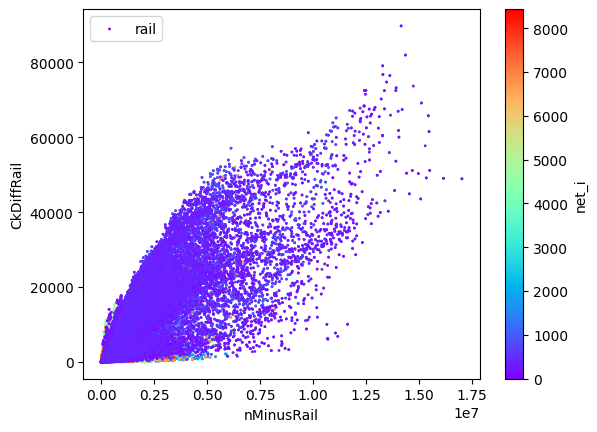

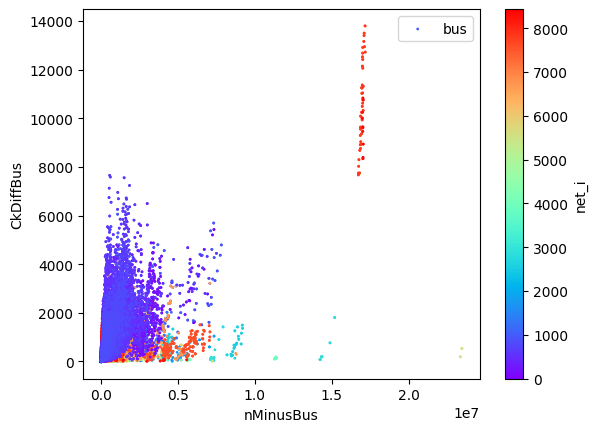

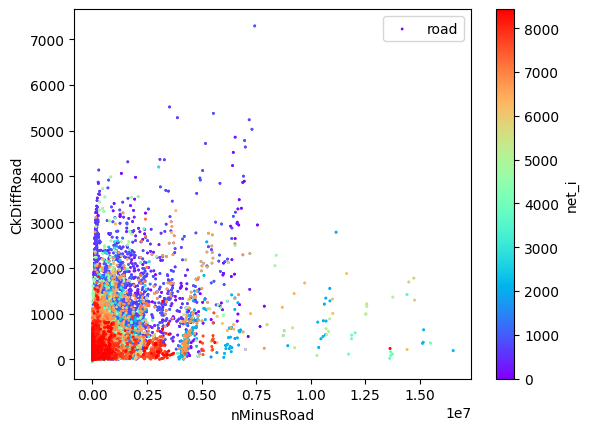

In [24]:
#analysis code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#df_raildataOiDj = pd.read_csv('raildata_OiDj.csv')
#df_busdataOiDj = pd.read_csv('busdata_OiDj.csv')
#df_roaddataOiDj = pd.read_csv('roaddata_OiDj.csv')

print('rail count=',df_raildataOiDj.shape[0])
#add a row - interesting: savedSecsRail CkDiffRail nMinusRail
#df_raildataOiDj['net_i_DjAll_SavedSecs']= df_raildataOiDj['net_i_Dj_all'] * df_raildataOiDj['savedSecsRail']
df_raildataOiDj.plot(kind = 'scatter', s=1, x = 'nMinusRail', y = 'CkDiffRail', c='net_i', cmap="rainbow")
plt.legend(['rail'])
plt.show()

df_busdataOiDj.plot(kind = 'scatter', s=1, x = 'nMinusBus', y = 'CkDiffBus', c='net_i', cmap="rainbow")
plt.legend(['bus'])
plt.show()

df_roaddataOiDj.plot(kind = 'scatter', s=1, x = 'nMinusRoad', y = 'CkDiffRoad', c='net_i', cmap="rainbow")
plt.legend(['road'])
plt.show()



EXPERIMENTAL: i,j analysis

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']
0.3056330561637878 113837595.4429246 175793


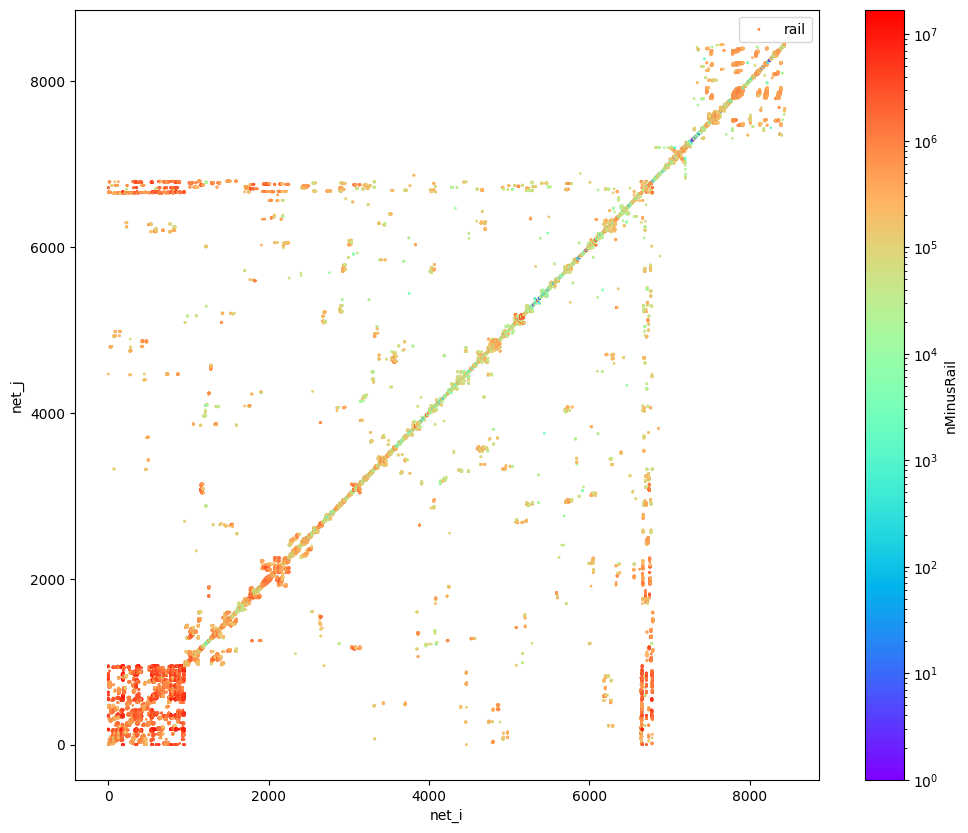

In [66]:
import matplotlib
#load?
print(matplotlib.scale.get_scale_names())
#head = df_raildataOiDj[ df_raildataOiDj.savedSecsRail<1000000 ]
#head.reset_index(drop=True)
#tail = df_raildataOiDj[ df_raildataOiDj.savedSecsRail>100000000 ]
#print(np.min(head['savedSecsRail']),np.max(head['savedSecsRail']),len(head))
#print(np.min(tail['savedSecsRail']),np.max(tail['savedSecsRail']),len(tail))
print(np.min(df_raildataOiDj['savedSecsRail']),np.max(df_raildataOiDj['savedSecsRail']),len(df_raildataOiDj))
df_raildataOiDj.plot(kind = 'scatter', s=1, figsize=(12,10), x = 'net_i', y = 'net_j', c='nMinusRail', alpha=1.0, cmap="rainbow", norm="log")
plt.legend(['rail'])
plt.show()

#df_busdataOiDj.plot(kind = 'scatter', s=1, x = 'net_i', y = 'net_j', c='CkDiffBus', cmap="rainbow")
#plt.legend(['bus'])
#plt.show()

#df_roaddataOiDj.plot(kind = 'scatter', s=1, x = 'net_i', y = 'net_j', c='CkDiffRoad', cmap="rainbow")
#plt.legend(['road'])
#plt.show()